### Neural Networks with Python - Customer Churn dataset

A bank has asked you to create a customer churn model that will predict whether a customer will churn (leave the bank/stop doing business with the bank/close accounts) based on the his/her activity with the bank in past. Following information is given to you:

* CustomerId: Unique ID given to each customer
* Surname: Lastname of the customer
* CreditScore: Credit Score of the Customer
* Geography: Residence location of the Customer
* Gender: Gender of the customer
* Age: Age of the customer (at the time of enrollment)
* Tenure: number of months customer has been a customer (at the time of the data collection)
* Balance: total amount of money customer has in checking/savings account
* NumOfProducts: number of bank products customer has been using
* HasCrCard: whether customer has the bank credit card
* IsActiveMember: whether customer is considered active based on account usage 
* EstimatedSalary: estimated salary of the customer
* Exited: whether customer has left the bank or not (1- churn, 0-not churn)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv("Churn_Modelling.csv")

In [3]:
dataset.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### Exploratory Data Analysis

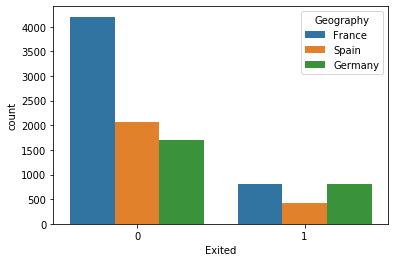

In [5]:
sns.countplot(x="Exited",hue="Geography",data=dataset)

### Creating dummy variables for categorical variables

In [6]:
gender_dummy = pd.get_dummies(dataset["Gender"],drop_first=True)

In [7]:
geography_dummy = pd.get_dummies(dataset["Geography"],drop_first=True)

In [8]:
dataset= pd.concat([gender_dummy,geography_dummy,dataset],axis=1)

In [9]:
dataset.head()

,Male,Germany,Spain,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
dataset = dataset.drop(["CustomerId","Surname","Gender","Geography"],axis=1)

In [11]:
dataset.head()

,Male,Germany,Spain,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,42,2,0.00,1,1,1,101348.88,1
1,0,0,1,608,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,39,1,0.00,2,0,0,93826.63,0
4,0,0,1,850,43,2,125510.82,1,1,1,79084.10,0


### Train/test split

In [12]:
X = dataset.drop("Exited",axis=1)
y = dataset["Exited"]

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state=0)

### Data Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
sc = StandardScaler()

In [17]:
X_train = sc.fit_transform(X_train)

In [18]:
X_test = sc.transform(X_test)

### Model Creation using Keras

In [20]:
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential

In [21]:
from keras.layers import Dense

In [22]:
# create the NN object, since we are doing classification, I called it classifier
classifier = Sequential()

When we add the first hidden layer, we also add the input layer. input_dim parameter shows the number neurons in the input layer, which should be equal to the number of features in the dataset. In our case, we have 11 features.

For hidden layer characteristics, we define the number neurons using units parameter. There is no set rule on how many neurons there should be in a hidden layer but there are some recommendations:

* The number of hidden neurons should be between the size of the input layer and the size of the output layer. (In our case, that means a number between 11 and 1.) 
* The number of hidden neurons should be average (or 2/3) of the size of the input layer, plus the size of the output layer. (So in our case, that would be 11+1 =12 so we can choose 6 as the number of neurons in our hidden layer. 

For activation function, I chose rectifier as it is widely applicable to many different problems but do check out different types of activation functions!

In [23]:
# Input layer and first hidden layer
classifier.add(Dense(input_dim=11,units=6,activation="relu"))

In [24]:
# Second hidden layer - not very necessary in our case
classifier.add(Dense(units=6, activation="relu" ))

In [25]:
# Output layer
classifier.add(Dense(units=1, activation="sigmoid"))

After adding our layers, we need to compile our model. Compiling essentially means applying gradient descent on the neural network we just created.

The parameter "optimizer" is where we define our gradient descent. And there are different types (which you can read on Keras documentation) but for our code, we will define our optimizer as “adam“, which is a popular version of stochastic gradient descent because it automatically tunes itself and gives good results in a wide range of problems.

We also need to specify the cost (loss) function to use to evaluate a set of weights. Again there are different loss functions, you can check them out from the link I've posted on BB. Since our problem is a binary classification problem, we will use a loss function called “binary_crossentropy“.

Then, we need to add our final argument - which is the evaluation of the model. We have seen this for our other models as well, since this is a classification problem, we can use accuracy as our metric.

In [26]:
classifier.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [27]:
classifier.fit(X_train,y_train, epochs=20, batch_size=10)


Epoch 1/20
8000/8000 [==============================] - 1s 97us/step - loss: 0.4857 - accuracy: 0.7910
Epoch 2/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.4267 - accuracy: 0.8207
Epoch 3/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.4126 - accuracy: 0.8245
Epoch 4/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.4041 - accuracy: 0.8265
Epoch 5/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.3971 - accuracy: 0.8282
Epoch 6/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.3932 - accuracy: 0.8289
Epoch 7/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.3889 - accuracy: 0.8301
Epoch 8/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.3858 - accuracy: 0.8313
Epoch 9/20
8000/8000 [==============================] - 1s 75us/step - loss: 0.3827 - accuracy: 0.8324
Epoch 10/20
8000/8000 [==============================] - 1s 75us/step - 

### Model Predictions

In [28]:
y_pred = classifier.predict(X_test)

In [29]:
y_pred = (y_pred>0.5)

In [30]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

### Model Evaluation

In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
cm = confusion_matrix(y_test,y_pred)

In [33]:
cm

array([[1524,   71],
       [ 218,  187]])

In [34]:
from sklearn.metrics import classification_report

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1595
           1       0.72      0.46      0.56       405

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.84      0.86      0.84      2000

